In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read the AirBnB Data
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# Access the data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
# Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [10]:
# ✅ Drop duplicate records
df.drop_duplicates(inplace=True)

# ✅ Drop columns only if they exist
df.drop(columns=['house_rules', 'license'], inplace=True, errors='ignore')

# ✅ Clean price and service fee safely (handle missing, numeric, or string values)
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                      # ensure string
            .str.replace('$', '', regex=False) # remove dollar signs
            .str.replace(',', '', regex=False) # remove commas
        )
        # convert to float if possible
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ Rename columns if they exist
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)

# ✅ Drop rows with NaN (only if critical fields are missing)
df.dropna(subset=['price_$', 'service_fee_$', 'last review'], inplace=True)

# ✅ Fix datatypes safely
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
if 'construction year' in df.columns:
    df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce')
    df['construction year'].fillna(df['construction year'].mode()[0], inplace=True)
    df['construction year'] = df['construction year'].astype(int)

# ✅ Correct spelling in neighbourhood group safely
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# ✅ Remove unrealistic availability values (>365, not 500)
if 'availability 365' in df.columns:
    df = df[df['availability 365'] <= 365]


In [11]:
df.duplicated().value_counts()

,count
False,83381


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83381 entries, 0 to 102044
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83381 non-null  object        
 1   NAME                            83176 non-null  object        
 2   host id                         83381 non-null  object        
 3   host_identity_verified          83157 non-null  object        
 4   host name                       83069 non-null  object        
 5   neighbourhood group             83367 non-null  object        
 6   neighbourhood                   83369 non-null  object        
 7   lat                             83374 non-null  float64       
 8   long                            83374 non-null  float64       
 9   country                         82911 non-null  object        
 10  country code                    83292 non-null  object        
 11  instan

In [13]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83374.000000,83374.000000,83315.000000,83233.000000,83381.000000,83381.000000,83075.000000,83322.000000,83381,83371.000000,83126.000000,83138.000000,83381.000000
mean,40.727347,-73.948317,0.497689,2012.488724,626.395006,125.279992,7.444105,32.143840,2019-06-22 18:02:38.798766848,1.390642,3.285867,7.093688,135.156379
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982090,0.000000,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721310,-73.953620,0.000000,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,93.000000
75%,40.762570,-73.930599,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056420,0.050600,0.499998,5.765199,331.634481,66.330332,28.259683,51.829194,NaN,1.758884,1.278787,29.720333,128.389449


In [15]:
# What are the different property types (room types) in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,44022
Private room,37587
Shared room,1659
Hotel room,113


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

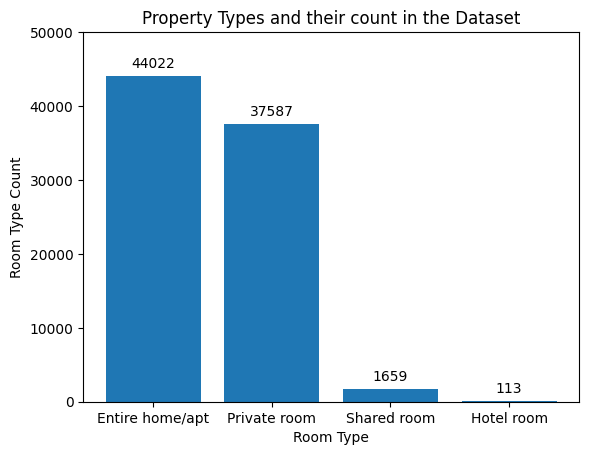

In [16]:
# room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"] )
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4 )
plt.ylim([0,50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')


In [18]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34570
Manhattan,34475
Queens,11187
Bronx,2306
Staten Island,829


Text(0.5, 1.0, 'Which Neighborhood Groups has the highest number of Listings')

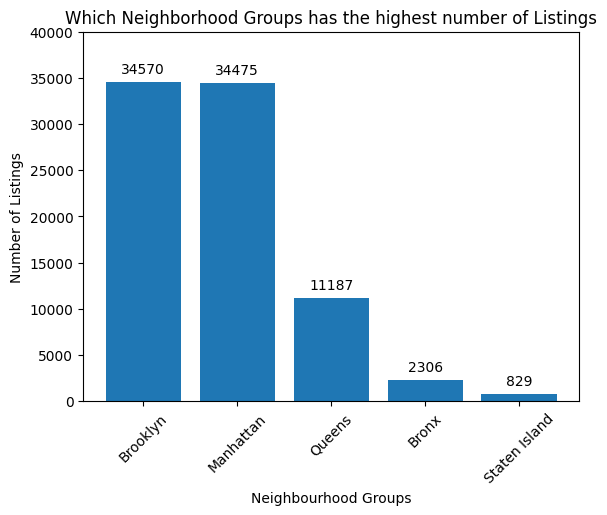

In [19]:
# Plotting code
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, 'count'])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, 'count'], padding = 4 )
plt.ylim([0,40000])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 45)
plt.title('Which Neighborhood Groups has the highest number of Listings')

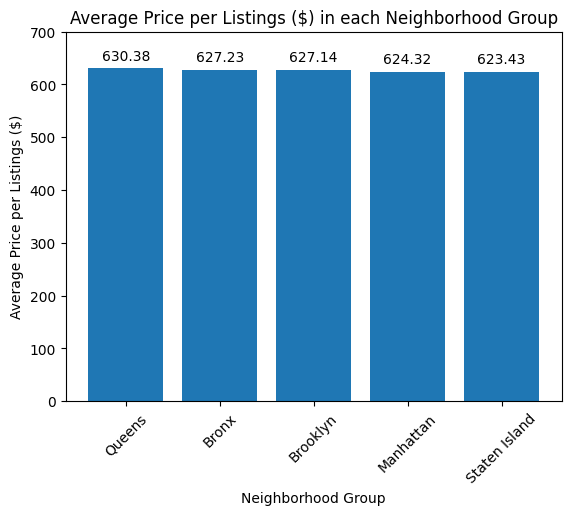

In [31]:

#which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label (avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4 ); plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

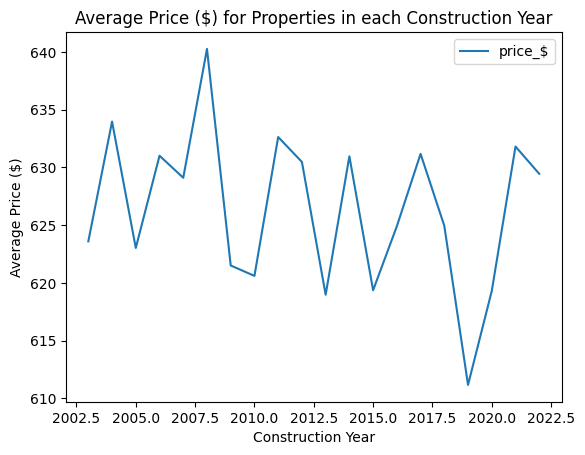

In [35]:

#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

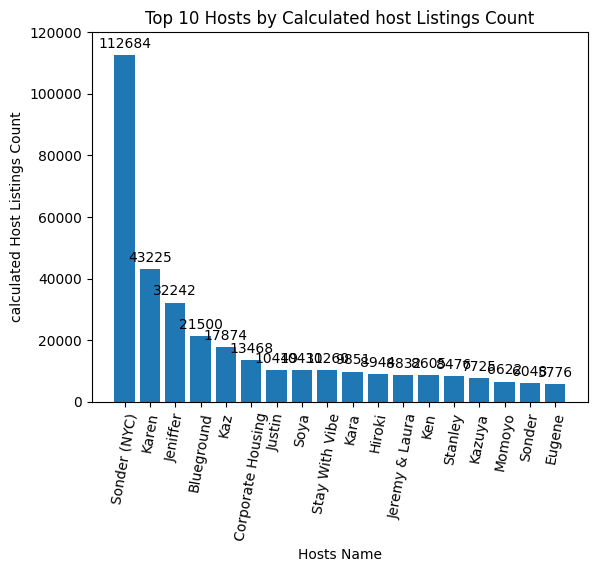

In [36]:

#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values (ascending = False).nlargest (18).to_frame()
hosts_bar = plt.bar (hosts. index, hosts.loc[:, 'calculated host listings count' ]);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [38]:

#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.290163
unconfirmed,3.281751


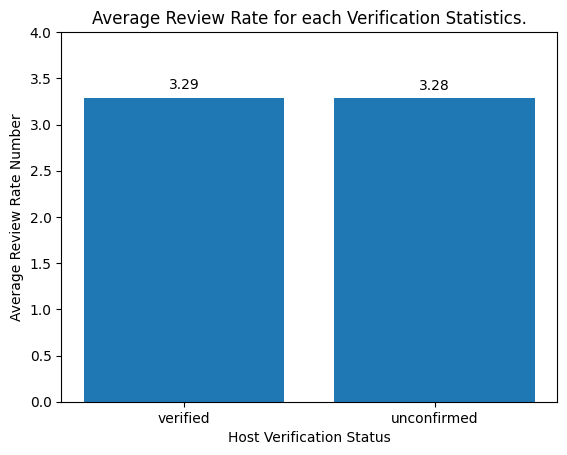

In [40]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4 ); plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

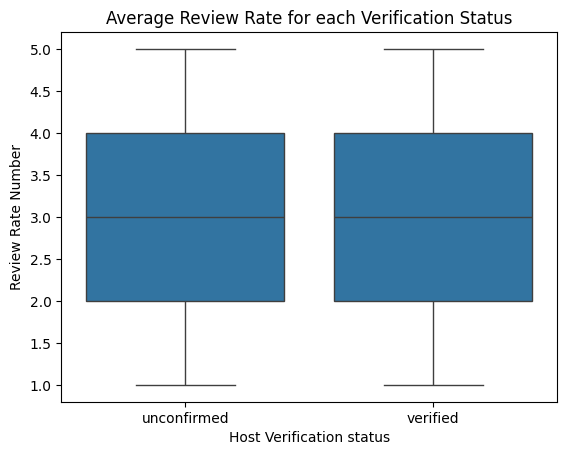

In [41]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color =base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');


In [57]:
#Is there a correlation between the price of a listing and its service fee?
float(df['price_$'].corr(df['service_fee_$']))

0.9999908937235832

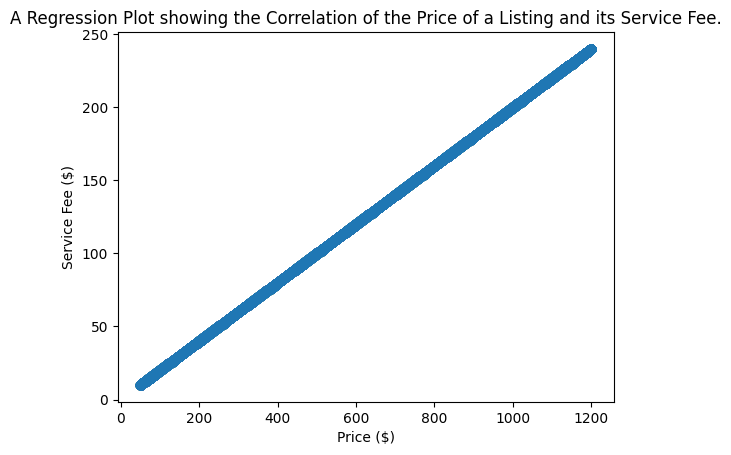

In [48]:
sns.regplot(df, x = 'price_$', y= 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [49]:
#what is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN =df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN


review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379233
                    Private room               3.322188
                    Shared room                3.340909
Brooklyn            Entire home/apt            3.252111
                    Hotel room                 3.857143
                    Private room               3.283680
                    Shared room                3.316476
Manhattan           Entire home/apt            3.272634
                    Hotel room                 3.500000
                    Private room               3.290455
                    Shared room                3.269173
Queens              Entire home/apt            3.358813
                    Hotel room                 3.750000
                    Private room               3.322943
                    Shared room                3.328571
Staten Island       Entire home/apt            3.325472
                    Private room               3.487310
                    Shared room                3.875000

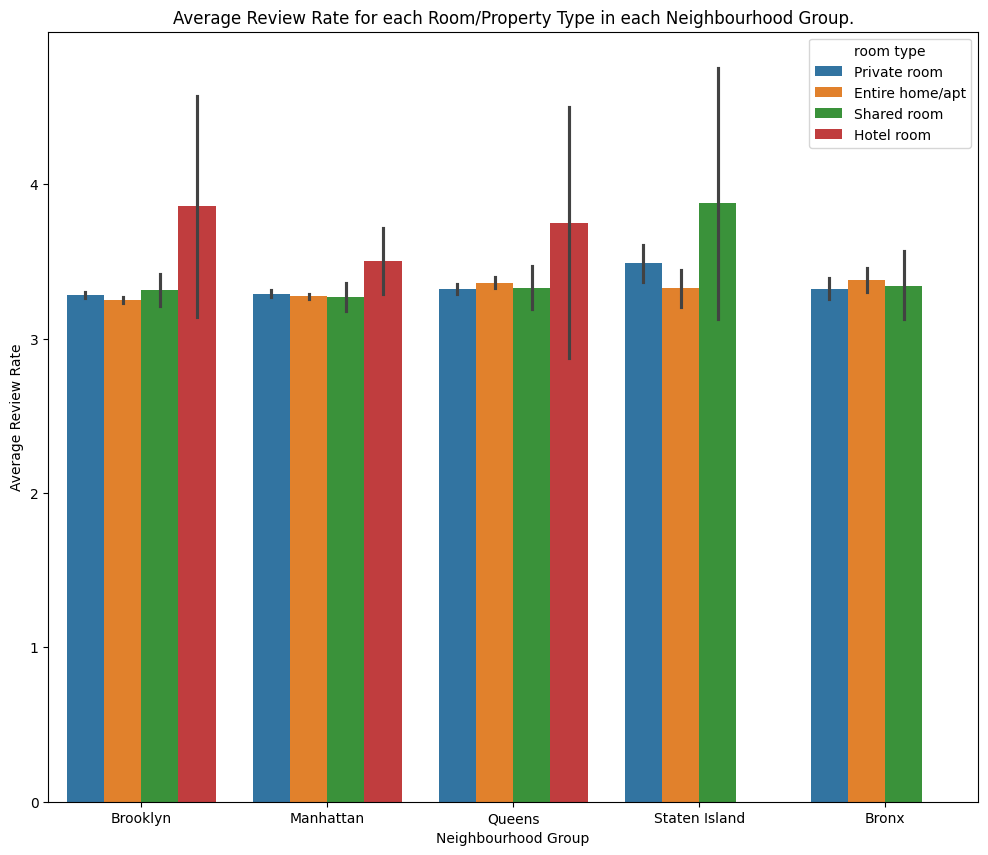

In [51]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue='room type' );
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

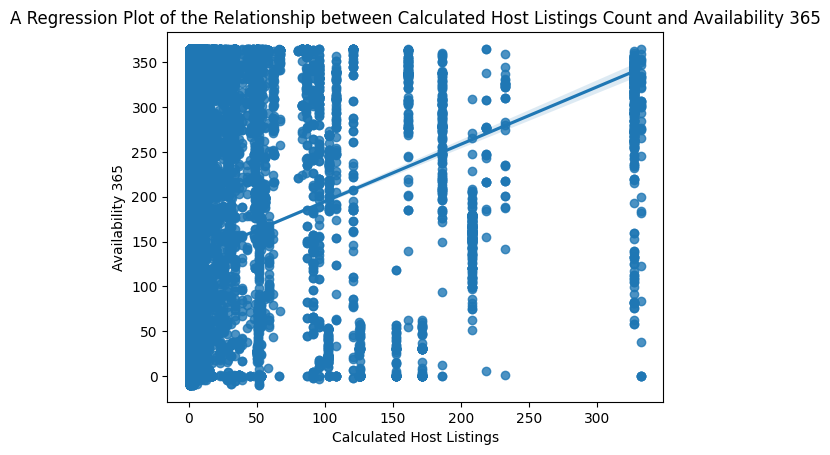

In [53]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [55]:
float(df['calculated host listings count'].corr(df['availability 365']))


0.14822887907060517